In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.table import Table, join, Column
from utils import plot_xs
import astropy.coordinates as coord
from astropy import units as u

In [2]:
matches_table = Table(np.genfromtxt('good_matches.csv', delimiter=',', 
                                    names=True, dtype=None, encoding=None))
matches_table['source_id'] = matches_table['gaia_id_match'].astype(int)

In [3]:
gaia_table = Table.read('../kepler_dr2_1arcsec.fits', format='fits')
kepler_gaia_table = gaia_table['source_id','kepid']

In [4]:
kepler_matches = join(matches_table, kepler_gaia_table, keys=['source_id'], join_type='left')

In [5]:
kic_inds = (~kepler_matches['kepid'].mask)
kepid2 = kepler_matches['kepid'][kic_inds]
kepid1 = kepler_matches['kic_primary'][kic_inds]

In [6]:
kepler_matches[kic_inds]

kic_primary,gaia_id_primary,gaia_id_match,ra_match_keptime,dec_match_keptime,ra_match_gaia,dec_match_gaia,gaiamag_match,chisq,chisq_zeropm_match,chisq_zeropm_primary,dec_primary_gaia,dec_primary_kep,ra_primary_gaia,ra_primary_kep,source_id,kepid
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
5131276.0,2.073534863921029e+18,2.0735356198352604e+18,299.29628130819174,40.27002738688024,299.29627091371685,40.270008944266266,14.53629,0.8670341968536377,29.76190948486328,6331.67236328125,40.26533856957155,40.265339,299.3215039315961,299.32156,2073535619835260416,5131160
6507433.0,2.103947252448389e+18,2.1039472524483886e+18,286.5073592932247,41.92210991955265,286.50735701664314,41.92212982155551,14.370059,8.577411651611328,18480.28125,8144.4765625,41.922764835056796,41.922741,286.5087685035134,286.50876,2103947252448388608,6507427
10788461.0,2.1309915963587825e+18,2.1309915619990566e+18,288.17095664780254,48.17544117477617,288.1709288466962,48.175450338859456,14.138437,2.5897765159606934,56256.3984375,47187.3828125,48.16515295912267,48.16515,288.16243959171214,288.16251,2130991561999056640,10788476


In [7]:
np.savetxt('good_matches_both_kics.txt', np.array([kepid1, kepid2]).T, fmt='%10i')

In [8]:
hdul = fits.open('../mcquillan.fit')
mcquillan = Table(hdul[1].data)

In [9]:
prot1 = np.zeros(len(kepid1), dtype=np.float64)
prot2 = np.zeros_like(prot1)

for i, (k1, k2) in enumerate(zip(kepid1, kepid2)):
    ind1 = np.where(mcquillan['KIC'] == k1)[0]
    if len(ind1) == 1:
        prot1[i] = mcquillan[ind1]['Prot']
    ind2 = np.where(mcquillan['KIC'] == k2)[0]
    if len(ind2) == 1:
        prot2[i] = mcquillan[ind2]['Prot']

In [10]:
print(prot1)

[0. 0. 0.]


In [11]:
print(prot2)

[ 0.     0.    18.625]


### pairs with secondary within 12" of primary:

In [12]:
primary_coords_kep = coord.SkyCoord(ra=matches_table['ra_primary_kep'] * u.degree, 
                          dec=matches_table['dec_primary_kep'] * u.degree) 
match_coords_kep = coord.SkyCoord(ra=matches_table['ra_match_keptime'] * u.degree, 
                          dec=matches_table['dec_match_keptime'] * u.degree) 
primary_coords_gaia = coord.SkyCoord(ra=matches_table['ra_primary_gaia'] * u.degree, 
                          dec=matches_table['dec_primary_gaia'] * u.degree) 
match_coords_gaia = coord.SkyCoord(ra=matches_table['ra_match_gaia'] * u.degree, 
                          dec=matches_table['dec_match_gaia'] * u.degree)  

In [13]:
sep_kep = primary_coords_kep.separation(match_coords_kep)
sep_gaia = primary_coords_gaia.separation(match_coords_gaia)
mask = sep_kep < 12. * u.arcsec
matches_table.remove_column('source_id')
col1 = Column(data=sep_kep.arcsec, name='sep_keptime')
matches_table.add_column(col1)
col2 = Column(data=sep_gaia.arcsec, name='sep_gaia')
matches_table.add_column(col2)
matches_table[mask].write('good_matches_12arcsec.csv', format='csv', overwrite=True)

(array([ 46.,  85., 116., 170., 253., 299., 327., 388., 426., 448.]),
 array([  0.60784211,  12.54130648,  24.47477085,  36.40823522,
         48.34169959,  60.27516396,  72.20862833,  84.14209269,
         96.07555706, 108.00902143, 119.9424858 ]),
 <a list of 10 Patch objects>)

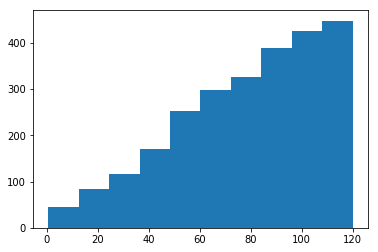

In [14]:
plt.hist(sep_kep.arcsec)

And again for K2...

In [15]:
matches_table = Table(np.genfromtxt('good_matches_k2.csv', delimiter=',', 
                                    names=True, dtype=None, encoding=None))
matches_table['source_id'] = matches_table['gaia_id_match'].astype(int)

In [16]:
gaia_table = Table.read('../k2_dr2_1arcsec.fits', format='fits')
k2_gaia_table = gaia_table['source_id','epic_number']

In [17]:
k2_matches = join(matches_table, k2_gaia_table, keys=['source_id'], join_type='left')

In [18]:
inds = (~k2_matches['epic_number'].mask)
epic2 = k2_matches['epic_number'][inds]
epic1 = k2_matches['epic_primary'][inds]

In [19]:
print(epic1)

epic_primary
------------


In [20]:
primary_coords_kep = coord.SkyCoord(ra=matches_table['ra_primary_kep'] * u.degree, 
                          dec=matches_table['dec_primary_kep'] * u.degree) 
match_coords_kep = coord.SkyCoord(ra=matches_table['ra_match_keptime'] * u.degree, 
                          dec=matches_table['dec_match_keptime'] * u.degree) 
primary_coords_gaia = coord.SkyCoord(ra=matches_table['ra_primary_gaia'] * u.degree, 
                          dec=matches_table['dec_primary_gaia'] * u.degree) 
match_coords_gaia = coord.SkyCoord(ra=matches_table['ra_match_gaia'] * u.degree, 
                          dec=matches_table['dec_match_gaia'] * u.degree)  

In [21]:
sep_kep = primary_coords_kep.separation(match_coords_kep)
sep_gaia = primary_coords_gaia.separation(match_coords_gaia)
mask = sep_kep < 12. * u.arcsec
matches_table.remove_column('source_id')
col1 = Column(data=sep_kep.arcsec, name='sep_keptime')
matches_table.add_column(col1)
col2 = Column(data=sep_gaia.arcsec, name='sep_gaia')
matches_table.add_column(col2)
matches_table[mask].write('good_matches_k2_12arcsec.csv', format='csv', overwrite=True)

(array([17.,  8., 16., 22., 21., 26., 35., 51., 50., 56.]),
 array([  1.81868019,  13.64497611,  25.47127203,  37.29756795,
         49.12386387,  60.95015979,  72.77645571,  84.60275163,
         96.42904755, 108.25534347, 120.08163939]),
 <a list of 10 Patch objects>)

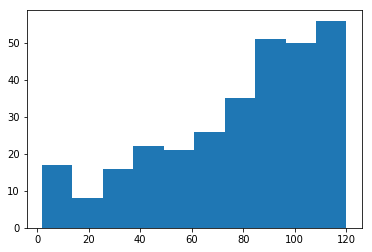

In [22]:
plt.hist(sep_kep.arcsec)